# Multi-label

Reminder - https://docs.fast.ai/tutorial.vision.html

In [1]:
from fastai.data.all import *
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PASCAL_2007)
path.ls()

(#9) [Path('/home/nelth/.fastai/data/pascal_2007/valid.json'),Path('/home/nelth/.fastai/data/pascal_2007/test.json'),Path('/home/nelth/.fastai/data/pascal_2007/test'),Path('/home/nelth/.fastai/data/pascal_2007/train.json'),Path('/home/nelth/.fastai/data/pascal_2007/test.csv'),Path('/home/nelth/.fastai/data/pascal_2007/segmentation'),Path('/home/nelth/.fastai/data/pascal_2007/train.csv'),Path('/home/nelth/.fastai/data/pascal_2007/train'),Path('/home/nelth/.fastai/data/pascal_2007/models')]

In [3]:
df = pd.read_csv(path/"train.csv")
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [4]:
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [5]:
pascal = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=ColSplitter('is_valid'),
                   get_x=ColReader('fname', pref=str(path/'train') + os.path.sep),
                   get_y=ColReader('labels', label_delim=' '),
                   item_tfms = Resize(460),
                   batch_tfms=aug_transforms(size=224))

In [6]:
dls = pascal.dataloaders(df)

/home/nelth/anaconda3/envs/airbnb-furniture-finder/lib/python3.9/site-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


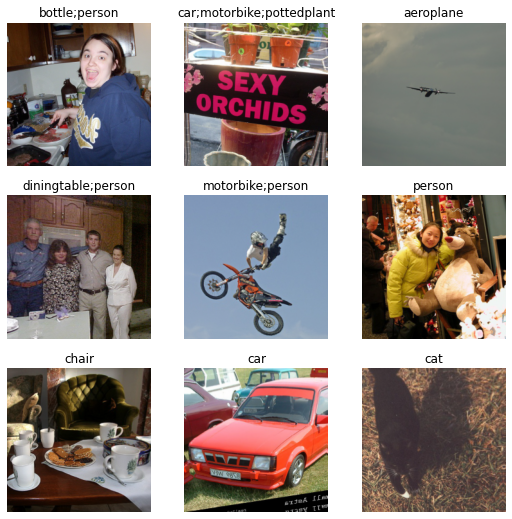

In [7]:
dls.show_batch()

In [8]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))

SuggestedLRs(valley=0.0010000000474974513)

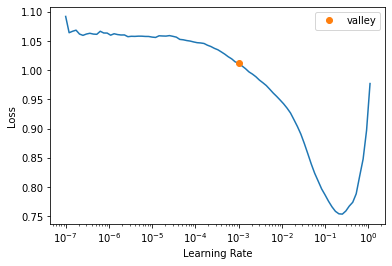

In [9]:
learn.lr_find()

In [10]:
# DO NOT TOUCH
# DO NOT TOUCH
# DO NOT TOUCH

# learn.fine_tune(epochs=2, base_lr=3e-2)

In [11]:
learn.fine_tune(epochs=2, base_lr=3e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.426954,0.133771,0.960657,00:17


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.182297,0.450339,0.924064,00:19
1,0.175194,0.149173,0.951474,00:19


In [12]:
learn.fine_tune(epochs=5, base_lr=3e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.147552,0.144942,0.952769,00:17


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.150930,0.261793,0.936275,00:19
1,0.164106,0.442211,0.941833,00:19
2,0.154940,0.131030,0.951813,00:19
3,0.135443,0.126775,0.955020,00:19
4,0.111848,0.112848,0.959223,00:19


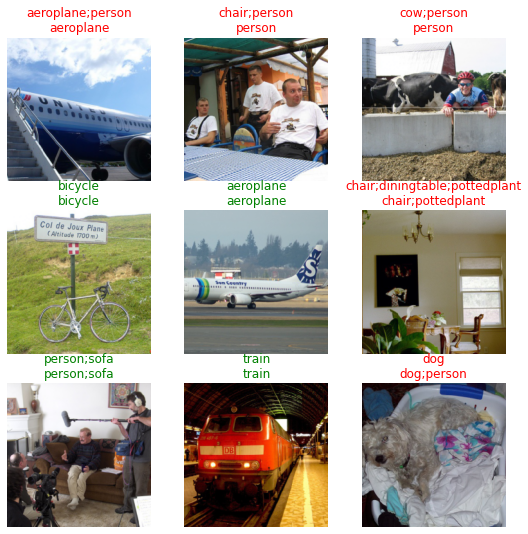

In [13]:
learn.show_results()

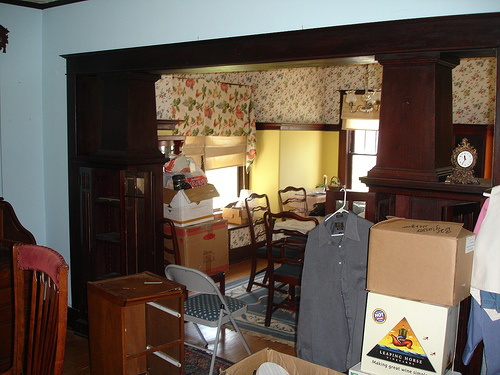

In [14]:
Image.open(path/'train/000005.jpg')

In [15]:
learn.predict(path/'train/000005.jpg')

((#2) ['chair','diningtable'],
 TensorBase([False, False, False, False, False, False, False, False,  True, False,
          True, False, False, False, False, False, False, False, False, False]),
 TensorBase([8.9940e-04, 1.9402e-03, 1.1619e-03, 1.8130e-03, 2.4790e-02, 1.7371e-03,
         6.6448e-04, 6.0401e-03, 8.8368e-01, 9.0939e-05, 7.0400e-01, 2.2122e-02,
         2.7834e-04, 1.1993e-03, 3.2150e-01, 1.4319e-01, 9.7185e-05, 2.3525e-01,
         1.1982e-03, 5.5265e-02]))

,target,predicted,probabilities,loss
0,bicycle;bus;car;person,boat,"TensorBase([[6.3515e-03, 1.0448e-04, 3.0454e-04, 5.6200e-01, 9.1886e-04, 2.2083e-01,\n 1.9433e-01, 3.1586e-05, 7.6673e-04, 4.1565e-04, 4.7480e-05, 1.4823e-05,\n 1.4058e-05, 2.9249e-04, 5.2997e-02, 1.9650e-03, 6.6318e-05, 4.4008e-05,\n 1.6015e-01, 3.1382e-04],\n [8.1878e-05, 4.5937e-03, 5.2871e-04, 1.0590e-03, 1.9277e-03, 4.2893e-03,\n 9.9466e-01, 2.2247e-03, 4.0708e-04, 9.1472e-05, 1.1721e-05, 1.0705e-05,\n 4.2925e-06, 3.0410e-04, 5.1338e-02, 1.3038e-03, 2.9397e-07, 1.3348e-04,\n 9.4666e-05, 5.9041e-05],\n [2.2066e-05, 6.5357e-04, 1.2134e-04, 2.2828e-05, 1.1699e-04, 2.0606e-05,\n 1.6927e-03, 9.0231e-05, 4.0309e-03, 1.0457e-01, 2.6695e-05, 9.7136e-01,\n 2.0258e-02, 3.3067e-03, 4.4786e-02, 3.0666e-04, 2.3532e-03, 4.1456e-03,\n 6.8198e-05, 4.7111e-04],\n [6.3636e-05, 2.5774e-04, 1.6456e-05, 7.8772e-04, 3.8078e-06, 2.5652e-04,\n 9.9955e-01, 6.0539e-06, 8.4073e-05, 2.2263e-05, 4.0358e-07, 8.1102e-07,\n 5.1289e-08, 2.0510e-04, 7.3740e-02, 8.3385e-04, 3.5945e-09, 3.3220e-05,\n 5.4746e-06, 6.2278e-07],\n [5.3396e-05, 2.5461e-03, 5.3204e-05, 5.5092e-04, 7.5200e-05, 3.4149e-04,\n 9.9927e-01, 4.1705e-05, 2.2699e-04, 1.6188e-05, 6.0687e-06, 1.6789e-06,\n 1.7246e-07, 1.4736e-03, 2.5880e-01, 3.8176e-03, 8.9330e-09, 4.2913e-05,\n 2.2686e-06, 1.8882e-06],\n [7.4877e-04, 1.2869e-02, 5.2463e-02, 5.5654e-04, 7.6999e-04, 8.4112e-04,\n 2.2116e-02, 1.0244e-02, 5.0129e-02, 7.3984e-04, 3.4510e-03, 2.7683e-03,\n 3.2260e-04, 8.8693e-04, 2.2657e-02, 8.8192e-01, 6.2165e-04, 1.0032e-02,\n 3.9138e-03, 2.7257e-03],\n [2.4046e-03, 5.6373e-03, 4.4138e-04, 4.5535e-02, 3.8013e-03, 1.0179e-01,\n 8.2215e-01, 2.4000e-03, 3.1829e-03, 9.7318e-04, 2.6000e-04, 1.9624e-04,\n 7.5880e-05, 1.5200e-01, 1.5041e-01, 5.6570e-03, 5.1614e-05, 1.1840e-03,\n 4.4453e-03, 5.9113e-04],\n [2.0153e-04, 1.3814e-02, 1.0265e-04, 1.2729e-03, 9.5353e-01, 5.4344e-03,\n 5.6660e-03, 5.0151e-04, 5.5749e-03, 7.7873e-06, 1.1040e-02, 3.8513e-04,\n 1.1401e-04, 1.0753e-03, 9.7542e-01, 1.6986e-02, 1.6252e-05, 3.7827e-04,\n 2.0809e-04, 9.8409e-03],\n [4.9199e-06, 9.9315e-06, 5.1057e-04, 8.9638e-07, 1.7999e-06, 1.3510e-07,\n 4.2086e-05, 4.2011e-05, 1.0725e-04, 1.5193e-02, 2.6872e-07, 9.9377e-01,\n 2.5712e-04, 3.0973e-05, 8.5395e-04, 3.5590e-06, 3.1544e-03, 8.2131e-04,\n 1.7341e-06, 2.4578e-05]])",0.8132112622261047


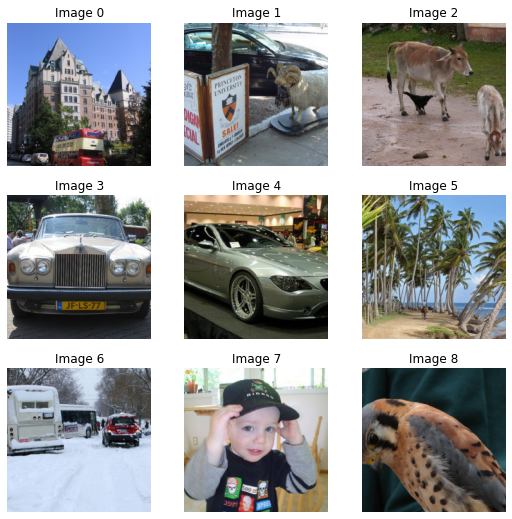

In [16]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

In [17]:
learn.predict(path/'train/000005.jpg')

((#2) ['chair','diningtable'],
 TensorBase([False, False, False, False, False, False, False, False,  True, False,
          True, False, False, False, False, False, False, False, False, False]),
 TensorBase([8.9940e-04, 1.9402e-03, 1.1619e-03, 1.8130e-03, 2.4790e-02, 1.7371e-03,
         6.6448e-04, 6.0401e-03, 8.8368e-01, 9.0939e-05, 7.0400e-01, 2.2122e-02,
         2.7834e-04, 1.1993e-03, 3.2150e-01, 1.4319e-01, 9.7185e-05, 2.3525e-01,
         1.1982e-03, 5.5265e-02]))

## Analysing results and optimising

In [18]:
download_path = Path.home()/"Downloads/"

In [19]:
to_predict = []
for entry in os.scandir(download_path):
    if entry.is_file():
        item_path = entry.path
        to_predict.append(item_path)

In [20]:
to_predict

['/home/nelth/Downloads/ezgif-1-e18e80669ecd.png',
 '/home/nelth/Downloads/ezgif-1-b01fad8e445a.png',
 '/home/nelth/Downloads/ezgif-1-2dac9873c62f.png',
 '/home/nelth/Downloads/ezgif-1-e18e80669ecd-update.png',
 '/home/nelth/Downloads/ezgif-2-926008ba2a3a.jpg',
 '/home/nelth/Downloads/ezgif-2-6749c7d3f7ea.jpg',
 '/home/nelth/Downloads/ezgif-2-181213b7fdfa.jpg']

In [30]:
img_to_predict = to_predict[3]
learn.predict(img_to_predict)

((#1) ['chair'],
 TensorBase([False, False, False, False, False, False, False, False,  True, False,
         False, False, False, False, False, False, False, False, False, False]),
 TensorBase([2.7472e-02, 7.3908e-03, 3.5281e-03, 8.0677e-03, 4.9888e-02, 6.2082e-03,
         5.2840e-03, 1.4466e-02, 5.5215e-01, 4.4950e-04, 1.7532e-01, 1.0634e-02,
         6.8397e-04, 4.5488e-03, 3.7647e-02, 4.2370e-02, 6.8427e-04, 1.3086e-01,
         7.3625e-03, 1.9612e-01]))

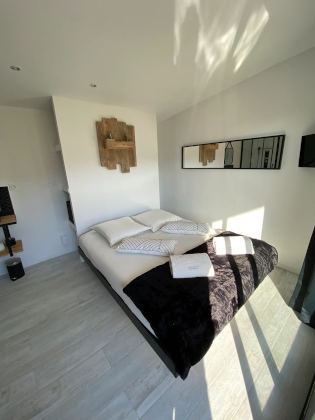

In [31]:
Image.open(img_to_predict)

lol

In [32]:
img_to_predict = to_predict[4]
learn.predict(img_to_predict)

((#1) ['pottedplant'],
 TensorBase([False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False,  True, False, False, False, False]),
 TensorBase([4.2954e-04, 2.1308e-02, 2.9103e-03, 4.9243e-03, 1.3420e-02, 7.6544e-03,
         3.8150e-02, 9.7843e-02, 3.9334e-01, 1.2679e-03, 4.0090e-02, 1.9454e-02,
         1.6271e-03, 6.7342e-03, 1.4457e-01, 8.3932e-01, 6.0653e-04, 1.5575e-01,
         3.3243e-03, 5.8241e-02]))

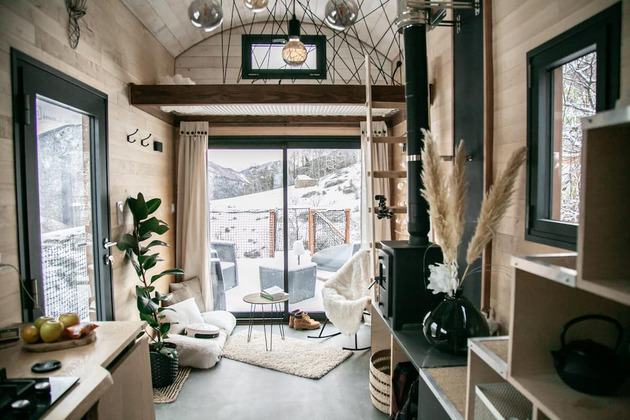

In [33]:
Image.open(img_to_predict)

In [34]:
img_to_predict = to_predict[-2]
learn.predict(img_to_predict)

((#1) ['pottedplant'],
 TensorBase([False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False,  True, False, False, False, False]),
 TensorBase([0.0026, 0.0079, 0.0098, 0.0233, 0.0087, 0.0115, 0.0587, 0.0505, 0.1403,
         0.0121, 0.0241, 0.0084, 0.0025, 0.0046, 0.0848, 0.7081, 0.0088, 0.0251,
         0.0845, 0.0279]))

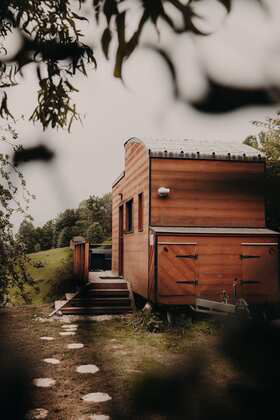

In [35]:
Image.open(img_to_predict)

In [36]:
img_to_predict = to_predict[-1]
learn.predict(img_to_predict)

((#1) ['bottle'],
 TensorBase([False, False, False, False,  True, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False]),
 TensorBase([8.1968e-03, 3.3967e-03, 2.2362e-03, 3.4038e-03, 9.4576e-01, 2.6793e-03,
         3.1734e-03, 1.9863e-03, 5.3568e-02, 1.2617e-04, 1.4970e-01, 1.0971e-03,
         3.8382e-04, 2.1480e-03, 2.9180e-01, 2.1747e-02, 1.6425e-04, 1.2085e-03,
         1.9245e-03, 4.7674e-03]))

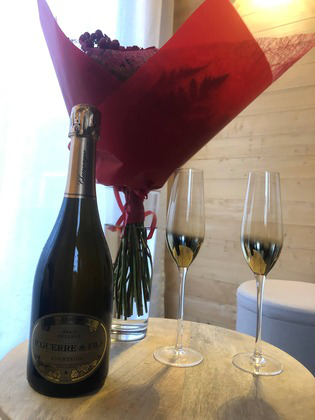

In [37]:
Image.open(img_to_predict)